In [6]:
import pandas as pd
import numpy as np # thư viện cho tính toán nói chung
df = pd.read_csv('./data/elantra.csv')

In [7]:
df.tail(10)

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
40,10,2012,14512,7.8,257,256.389,231.652
41,10,2013,14876,7.2,223,243.374,233.782
42,11,2010,8631,9.8,161,219.303,219.544
43,11,2011,12414,8.6,255,247.092,227.136
44,11,2012,15923,7.8,246,248.136,231.190
45,11,2013,16751,7.0,231,242.301,234.033
46,12,2010,13096,9.4,170,227.190,220.437
47,12,2011,13025,8.5,253,243.015,227.093
48,12,2012,19024,7.9,275,244.698,231.099
49,12,2013,21692,6.7,279,246.189,234.594


In [22]:
df.sort_values(by='Year', ascending=True)
df.sort_values(by='Month', ascending=True)
df.reset_index(drop=True, inplace=True)

In [23]:
df.tail(20)

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
30,8,2010,15181,9.5,202,208.927,218.012
31,8,2011,15054,9.0,336,247.112,226.149
32,8,2012,17989,8.1,341,245.455,229.952
33,8,2013,24700,7.2,271,244.917,233.433
34,9,2010,10062,9.5,150,209.850,218.281
35,9,2011,14386,9.0,357,249.732,226.674
36,9,2012,18305,7.8,374,254.333,231.086
37,9,2013,19691,7.2,298,245.566,233.743
38,10,2010,9497,9.5,178,216.655,219.024
39,10,2011,13000,8.8,370,246.971,226.761


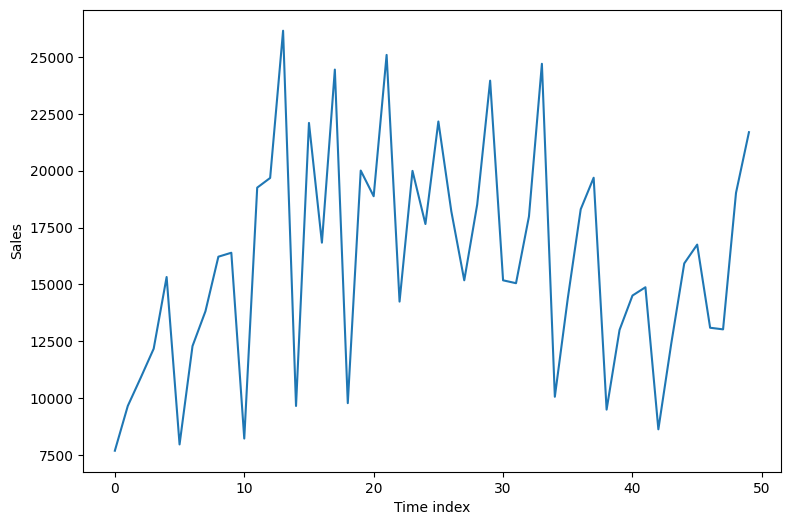

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(df.ElantraSales.values)
plt.xlabel('Time index')
plt.ylabel('Sales')
# function to show the plot
plt.show()

In [26]:
numeric_feats = df.columns.drop(["ElantraSales", "Month","Year"])
numeric_feats

Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all'], dtype='object')

In [27]:
df_train = df[df.Year < 2013]
df_test = df[df.Year >= 2013]
y_train = df_train.ElantraSales.values
y_test = df_test.ElantraSales.values

In [28]:
# Chuẩn hóa dữ liệu bằng StandardScaler, dữ liệu được chuẩn hóa theo dạng x ->
#(x-mean)/std
# Nếu x có phân phối Gauss, dữ liệu chuẩn hóa sẽ thuộc phân phối N(0,1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train[numeric_feats])
X_train = scaler.transform(df_train[numeric_feats])
X_test = scaler.transform(df_test[numeric_feats])

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [34]:
from sklearn.metrics import mean_squared_error
def relative_error(y_true, y_pred):
    errors = np.abs(y_pred - y_true).astype(float) / y_true
    return np.mean(errors)*100

y_pred_test = linear_model.predict(X_test)
print ('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print ('Mean relative errors: {:.1f}%'.format(relative_error(y_test, y_pred_test)))

RMSE: 5017.35
Mean relative errors: 19.0%


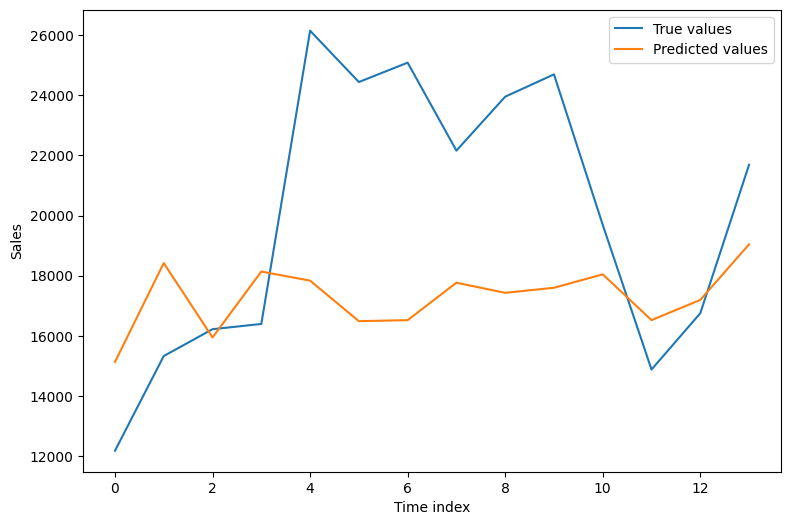

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(y_test, label='True values')
plt.plot(y_pred_test, label='Predicted values')
plt.xlabel('Time index')
plt.ylabel('Sales')
plt.legend()
# function to show the plot
plt.show()

In [36]:
month_onehot_train = pd.get_dummies(df_train.Month)
month_onehot_train.head()


,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,False,False


In [37]:
month_onehot_test = pd.get_dummies(df_test.Month)
X_train_with_month = np.hstack([X_train, month_onehot_train.values])
X_test_with_month = np.hstack([X_test, month_onehot_test.values])

In [42]:

X_test = np.hstack((X_test, month_onehot_test.values))

In [45]:
linear_model.fit(X_train_with_month, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred_test = linear_model.predict(X_test_with_month)
print ('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print ('Mean relative errors: {:.1f}%'.format(relative_error(y_test,y_pred_test)))

RMSE: 3590.37
Mean relative errors: 12.8%


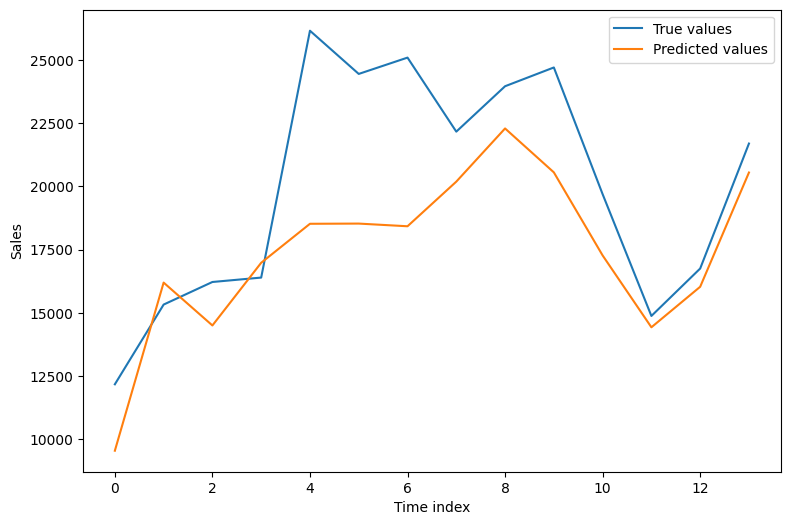

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(y_test, label='True values')
plt.plot(y_pred_test, label='Predicted values')
plt.xlabel('Time index')
plt.ylabel('Sales')
plt.legend()
# function to show the plot
plt.show()